In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install patool
!pip install pyvi

     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 8.5MB 21.9MB/s 
     |████████████████████████████████| 747kB 54.5MB/s 


In [ ]:
import patoolib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from collections import Counter
import codecs
import re
from pyvi import ViTokenizer, ViPosTagger

# Đọc dữ liệu

In [ ]:
patoolib.extract_archive("/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Test_Full.rar", outdir="/content/")
patoolib.extract_archive("/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Train_Full.rar", outdir="/content")

patool: Extracting /content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Test_Full.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Test_Full.rar"
patool:     with cwd='/content/'
patool: ... /content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Test_Full.rar extracted to `/content/'.
patool: Extracting /content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Train_Full.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Train_Full.rar"
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/Text Classification/data/10Topics/Ver1.1/Train_Full.rar extracted to `/content'.


'/content'

## Train

In [ ]:
path = "/content/"
trainDir = os.listdir(path + "Train_Full")

In [ ]:
trainDir

['The gioi',
 'Vi tinh',
 'Suc khoe',
 'Phap luat',
 'Kinh doanh',
 'Van hoa',
 'Khoa hoc',
 'Doi song',
 'The thao',
 'Chinh tri Xa hoi']

In [ ]:
X_train = []
y_train = []
for category in trainDir:
  print("Category: " + category)
  fileCa = os.listdir(path + "Train_Full/" + category)
  for filename in fileCa:
    # print(filename)
    with open(path + "Train_Full/" + category + "/" + filename, encoding='utf-8') as f:
    # with codecs.open(path + "Train_Full/" + category + "/" + filename, encoding='utf-8') as f:
      data = f.read()
      # data = data.decode("utf-8")
      X_train.append(data)
      y_train.append(category)
  print("-----------------------")

Category: The gioi
-----------------------
Category: Vi tinh
-----------------------
Category: Suc khoe
-----------------------
Category: Phap luat
-----------------------
Category: Kinh doanh
-----------------------
Category: Van hoa
-----------------------
Category: Khoa hoc
-----------------------
Category: Doi song
-----------------------
Category: The thao
-----------------------
Category: Chinh tri Xa hoi
-----------------------


## Test

In [ ]:
testDir = os.listdir(path + "Test_Full")
X_test = []
y_test = []
for category in testDir:
  print("Category: " + category)
  fileCa = os.listdir(path + "Test_Full/" + category)
  for filename in fileCa:
    # print(filename)
    with open(path + "Test_Full/" + category + "/" + filename, encoding='utf-8') as f:
    # with codecs.open(path + "Train_Full/" + category + "/" + filename, encoding='utf-8') as f:
      data = f.read()
      # data = data.decode("utf-8")
      X_test.append(data)
      y_test.append(category)
  print("-----------------------")

Category: The gioi
-----------------------
Category: Vi tinh
-----------------------
Category: Suc khoe
-----------------------
Category: Phap luat
-----------------------
Category: Kinh doanh
-----------------------
Category: Van hoa
-----------------------
Category: Khoa hoc
-----------------------
Category: Doi song
-----------------------
Category: The thao
-----------------------
Category: Chinh tri Xa hoi
-----------------------


##Kiểm tra xem có văn bản nào thuộc hai chủ đề trở lên không?


In [ ]:
# biến chứa tên của các văn bản của từng thể loại
nameFileCategories = {}
for category in trainDir:
  print("Category: " + category)
  fileNames = os.listdir(path + "Train_Full/" + category)
  fileNames = [re.sub("[^0-9]+", "", name) for name in fileNames]
  nameFileCategories[category] = fileNames

Category: The gioi
Category: Vi tinh
Category: Chinh tri Xa hoi
Category: Kinh doanh
Category: Khoa hoc
Category: Suc khoe
Category: Van hoa
Category: Doi song
Category: Phap luat
Category: The thao


In [ ]:
category = list(nameFileCategories.keys())

In [ ]:
def intersection(lst1, lst2):
  
    # Use of hybrid method
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    return lst3

In [ ]:
countTrung = np.zeros((len(category), len(category)))
for i in range(len(category)):
  for j in range(len(category)):
    if i != j:
      fileTrung = intersection(nameFileCategories[category[i]], 
                               nameFileCategories[category[j]])
      countTrung[i, j] = len(fileTrung)

In [ ]:
for cate in category:
  print(len(nameFileCategories[cate]))

2898
2481
5219
2552
1820
3384
3080
3159
3868
5298


Kết luận là không thể dựa vào tên file để nói là nó có thuộc hai chủ đề trở lên không. Nếu có thời gian thì kiểm tra nội dung

## Thống kê số văn bản có trong mỗi lớp của tập train và tập test

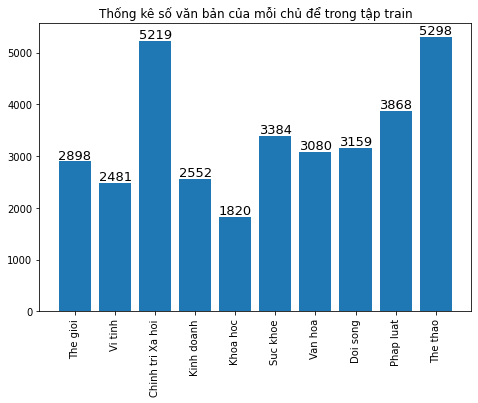

In [ ]:
# Số văn bản thuôc từng chủ đề của tập train 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
train_count = Counter(y_train)
ax.bar(list(train_count.keys()), list(train_count.values()))
# quay label đi 90 độ cho dễ nhìn
plt.xticks(rotation=90)
# Hiển thị giá trị trên từng cột
for index,data in enumerate(list(train_count.values())):
    plt.text(x=index , y = data + 50 , s=f"{data}" , fontdict=dict(fontsize=13), ha='center')
plt.title("Thống kê số văn bản của mỗi chủ để trong tập train")
plt.savefig("train.png", bbox_inches = 'tight')
plt.show()

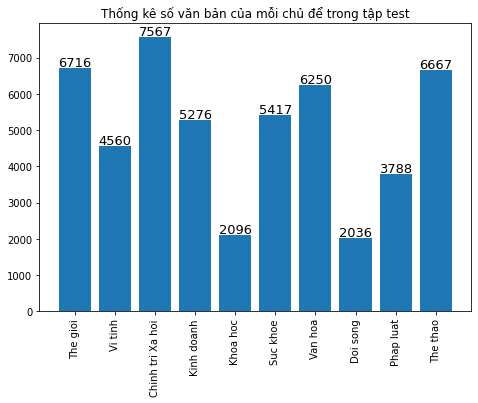

In [ ]:
# Số văn bản thuôc từng chủ đề của tập test
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
test_count = Counter(y_test)
ax.bar(list(test_count.keys()), list(test_count.values()))
# quay label đi 90 độ cho dễ nhìn
plt.xticks(rotation=90)
# Hiển thị giá trị trên từng cột
for index,data in enumerate(list(test_count.values())):
    plt.text(x=index , y = data + 50 , s=f"{data}" , fontdict=dict(fontsize=13), ha='center')
plt.title("Thống kê số văn bản của mỗi chủ để trong tập test")
plt.savefig("test.png", bbox_inches = 'tight')
plt.show()

# Tiền xử lý dữ liệu

Tiền xử lý dữ liệu tiếng Việt cho bài toán phân loại văn bản thường gồm các việc sau:

- Xóa HTML code (nếu có)
- Chuẩn hóa bảng mã Unicode (đưa về Unicode tổ hợp dựng sẵn)
- Chuẩn hóa kiểu gõ dấu tiếng Việt (dùng òa úy thay cho oà uý)
- Thực hiện tách từ tiếng Việt (sử dụng thư viện tách từ như pyvi, underthesea, vncorenlp,…)
- đưa về văn bản lower (viết thường)
- Xóa các ký tự đặc biệt: “.”, “,”, “;”, “)”, …

## Xóa HTML code trong dữ liệu

In [ ]:
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [ ]:
txt = "<p class=\"par\">This is an example</p>"
remove_html(txt)

'This is an example'

## Chuẩn hóa Unicode tiếng Việt

In [ ]:
'hiếu' == 'hiếu'

True

In [ ]:
'hiếu' == 'hiếu'

False

Nguyên nhân có lẽ là do người dùng sử dụng bộ mã khác nhau khi gõ tiếng Việt. Cụ thể đa số chúng ta đang dùng Unikey với bộ mã Unicode (dựng sẵn). Nhưng ở đâu đó, bộ mã Unicode tổ hợp vẫn được sử dụng. Do đó, đối với các nguồn dữ liệu thu thập trên internet thường bị lẫn cả 2 cách gõ này.

**Cách khắc phục:** Thay thế cách gõ Unicode tổ hợp bằng cách gõ của Unicode dựng sẵn.

In [ ]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)
 

## Chuấn hóa kiểu gõ dấu

In [ ]:
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\\p{P}*)([p{L}.]*\\p{L}+)(\\p{P}*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

In [ ]:
print(chuan_hoa_dau_cau_tieng_viet('anh hòa, đang làm.. gì'))

anh hòa, đang làm.. gì


## Tách từ tiếng Việt

In [ ]:
ViTokenizer.tokenize(u"Trường đại học bách khoa hà nội")

'Trường đại_học bách_khoa hà_nội'

## Đưa về viết thường (lowercase)
Việc đưa dữ liệu về chữ viết thường là rất cần thiết. Bởi vì đặc trưng này không có tác dụng ở bài toán phân loại văn bản. Đưa về chữ viết thường giúp giảm số lượng đặc trưng (vì máy tính hiểu hoa thường là 2 từ khác nhau) và tăng độ chính xác hơn cho mô hình.



## Xóa các ký tự không cần thiết
Tiền xử lý bao gồm việc loại bỏ các dữ liệu không có tác dụng cho việc phân loại văn bản. Việc này giúp:

- Giảm số chiều đặc trưng, tăng tốc độ học và xử lý
- Tránh làm ảnh hưởng xấu tới kết quả của mô hình

Các dấu ngắt câu, số đếm và các ký tự đặc biệt khác không giúp bạn phân loại một văn bản thuộc chuyên mục nào. Do đó, chúng ta nên loại bỏ nó đi.

Riêng với số đếm, ngày tháng, email (Các token đặc biệt). Nếu có thể, nên đưa nó về các token chung như: <number>, <date>, <email>, … Việc này có thể không giúp ích cho mô hình học tốt hơn nhưng sẽ giúp ích cho bạn trong việc giữ được mạch của dữ liệu.



## Loại bỏ các stopword tiếng Việt

In [ ]:
# Danh sách stopword
with open("/content/drive/MyDrive/Text Classification/data/vietnamese-stopwords.txt",
          encoding='utf-8') as f:
    stopword = list(set(f.read().split("\n")))
 
def remove_stopwords(doc):
    words = []
    for word in doc.split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

In [ ]:
remove_stopwords("rằng tôi là trường đại học")

'trường đại học'

## Tổng hợp của các bước trên

In [ ]:
def text_preprocess(document):
    # xóa html code
    document = remove_html(document)
     # tách từ
    document = ViTokenizer.tokenize(document)
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # chuẩn hóa cách gõ dấu tiếng Việt
    document = chuan_hoa_dau_cau_tieng_viet(document)
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]','',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    document = remove_stopwords(document)
    document = re.sub(r"[0-9]+", "<number>", document)
    return document

In [ ]:
text = """TP HCM phạt người không đeo khẩu trang nơi công cộng
Người dân ở thành phố không đeo khẩu trang nơi công cộng sẽ bị xử phạt mức cao nhất 300.000 đồng, từ ngày 5/8.
 
Yêu cầu này được Chủ tịch UBND thành phố Nguyễn Thành Phong đưa ra tại cuộc họp Ban chỉ đạo phòng chống dịch bệnh Covid-19 của TP HCM chiều 3/8.
 
Việc xử phạt không đeo khẩu trang nơi công cộng được TP HCM cũng như các địa phương khác thực hiện từ cuối tháng 3 khi Covid-19 bùng phát. Tuy nhiên, sau khi hết thực hiện cách ly xã hội từ ngày 23/4, việc đeo khẩu trang nơi công cộng chỉ dừng lại ở mức khuyến cáo.
 
Theo Nghị định số 176/2013, người dân không đeo khẩu trang nơi công cộng sẽ bị xử phạt từ 100.000 đến 300.000 đồng. Trong khoảng một tháng áp dụng trước đó, TP HCM đã xử phạt hơn 4.300 trường hợp với gần 870 triệu đồng.
 
Theo ông Phong, việc đeo khẩu trang đã được khẳng định có thể tránh lây lan dịch bệnh cho người khác và bảo vệ sức khỏe cho người sử dụng. "Sở Công thương phải nắm nguồn cung ứng khẩu trang, chủ động thông báo các điểm bán để người dân dễ dàng mua vì đã xử phạt thì phải bảo đảm đủ nguồn cung", ông Phong nói.
 
Đội trật tự đô thị phường Bến Nghé, quận 1, xử phạt người không đeo khẩu trang trên phố đi bộ Nguyễn Huệ, chiều 15/4. Ảnh: Quỳnh Trần.
Đội trật tự đô thị phường Bến Nghé, quận 1, xử phạt người không đeo khẩu trang trên phố đi bộ Nguyễn Huệ, chiều 15/4. Ảnh: Quỳnh Trần.
 
Bí thư Thành uỷ Nguyễn Thiện Nhân cũng cho rằng việc đeo khẩu trang là một trong những biện pháp cơ bản để tránh dịch bệnh lây lan. Việc này rất dễ làm, không tốn nhiều tiền nhưng nhiều nước bỏ lơi và đã bị "vỡ trận".
 
"Ngoài đường hiện có ít nhất 20% người không đeo khẩu trang. Người không đeo không những tự rước bệnh vào mình mà còn nguy cơ lây cho người khác. Đeo khẩu trang hơi cực tí thôi nhưng đi đâu cũng nên đeo để giữ an toàn", ông Nhân nói và khẳng định thành phố bảo đảm không thiếu khẩu trang cho người dân.
 
Chủ tịch UBND thành phố Nguyễn Thành Phong cũng cho biết đã đồng ý việc tái lập các chốt kiểm soát ở cửa ngõ TP HCM để phòng chống Covid-19.
 
Trước đó, thành phố đã lập 62 chốt kiểm soát, hoạt động 24/24 từ ngày 4/4 để phòng chống dịch. Lực lượng tham gia là Công an thành phố, Sở Y tế, Bộ Tư lệnh thành phố, Thanh tra giao thông, Ban Quản lý An toàn thực phẩm, quản lý thị trường.
 
Trong đó, 16 chốt chính (cấp thành phố) đặt tại: Trạm thu phí Long Phước (cao tốc TP HCM - Long Thành - Dầu Giây), cao tốc Trung Lương, cầu Đôi (đường Trần Văn Giàu), đường Ba Làng, đường Xuyên Á (quốc lộ 22), cầu Phú Cường, cầu Vĩnh Bình, cầu vượt Sóng Thần, quốc lộ 1K, quốc lộ 50, quốc lộ 1A, cầu Đồng Nai, Bến xe Miền Tây, Bến xe miền Đông, sân bay Tân Sơn Nhất, cảng Cát Lái.
 
Đến ngày 23/4, chính quyền thành phố dừng hoạt động các chốt này vì dịch bệnh đã được khống chế, TP HCM dừng cách ly xã hội theo Chỉ thị 19 của Thủ tướng.
 
Sau 19 ngày hoạt động, các chốt chính đã kiểm tra gần 270.000 xe, trong đó có 235.000 ôtô; gần 600.000 người được kiểm tra y tế, đo thân nhiệt, bao gồm cả 3.000 người nước ngoài; hơn 130.000 người được yêu cầu khai báo y tế.
 """

In [ ]:
text_preprocess(text)

'tp hcm phạt đeo khẩu_trang công_cộng dân thành_phố đeo khẩu_trang công_cộng xử_phạt <number> đồng <number> <number> yêu_cầu chủ_tịch ubnd thành_phố nguyễn_thành phong họp ban chỉ_đạo phòng_chống dịch_bệnh covid <number> tp hcm chiều <number> <number> xử_phạt đeo khẩu_trang công_cộng tp hcm địa_phương thực_hiện <number> covid <number> bùng_phát tuy_nhiên thực_hiện cách_ly xã_hội <number> <number> đeo khẩu_trang công_cộng dừng khuyến_cáo nghị_định <number> <number> dân đeo khẩu_trang công_cộng xử_phạt <number> <number> đồng áp_dụng tp hcm xử_phạt <number> trường_hợp <number> triệu đồng phong đeo khẩu_trang khẳng_định có_thể lây_lan dịch_bệnh bảo_vệ sức_khỏe sử_dụng sở công_thương nắm cung_ứng_khẩu_trang chủ_động thông_báo dân dễ_dàng mua xử_phạt bảo_đảm cung phong đội trật_tự đô_thị phường bến_nghé <number> xử_phạt đeo khẩu_trang phố đi nguyễn_huệ chiều <number> <number> ảnh quỳnh_trần đội trật_tự đô_thị phường bến_nghé <number> xử_phạt đeo khẩu_trang phố đi nguyễn_huệ chiều <number> <n

In [ ]:
# X_train_set = X_train.copy()
# y_train_set = y_train.copy()
# X_test_set = X_test.copy()
# y_test_set = y_test.copy()

In [ ]:
# tiền xử lý train và test
# X_train = [text_preprocess(doc) for doc in X_train]
# X_test = [text_preprocess(doc) for doc in X_test]

In [ ]:
# # Lưu lại cho lần sau khỏi phải xử lý
# with open("/content/drive/MyDrive/Text Classification/data/xTrain.txt", "w",encoding='utf-8') as f:
#   for doc in X_train:
#     f.write(doc + "\n")

# with open("/content/drive/MyDrive/Text Classification/data/yTrain.txt", "w",encoding='utf-8') as f:
#   for doc in y_train:
#     f.write(doc + "\n")

# with open("/content/drive/MyDrive/Text Classification/data/xTest.txt", "w",encoding='utf-8') as f:
#   for doc in X_test:
#     f.write(doc + "\n")

# with open("/content/drive/MyDrive/Text Classification/data/yTest.txt", "w",encoding='utf-8') as f:
#   for doc in y_test:
#     f.write(doc + "\n")


In [ ]:
# X_train = [remove_stopwords(doc) for doc in X_train]
# X_test = [remove_stopwords(doc) for doc in X_test]

# Model

## Read data

In [ ]:
with open("/content/drive/MyDrive/Text Classification/data/xTrain.txt",encoding='utf-8') as f:
    X_train = f.read().split("\n")[:-1]

with open("/content/drive/MyDrive/Text Classification/data/yTrain.txt",encoding='utf-8') as f:
  y_train = f.read().split("\n")[:-1]

with open("/content/drive/MyDrive/Text Classification/data/xTest.txt",encoding='utf-8') as f:
  X_test = f.read().split("\n")[:-1]

with open("/content/drive/MyDrive/Text Classification/data/yTest.txt",encoding='utf-8') as f:
  y_test = f.read().split("\n")[:-1]

In [ ]:
import numpy as np
import pandas as pd
import pickle
from time import time
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from collections import Counter
import codecs
import re

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Attention, Bidirectional, Layer, concatenate
# from keras.layers.merge import concatenate
from keras.models import Model, Sequential, load_model
from keras.optimizers import Adam, SGD
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers, initializers
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Load pre-train word embedding

In [ ]:
# X_train_ = " ".join(X_train)
# X_test_ = " ".join(X_test)
# sentences = X_train_ +" " + X_test_

In [ ]:
# temp = sentences.split()
# temp = list(set(temp))
# print(len(temp))

257300


In [ ]:
# word2vec_model = Word2Vec(size = 300, window=2, min_count = 1, workers = 2)
# word2vec_model.build_vocab(sentences)
# word2vec_model.intersect_word2vec_format('/content/drive/MyDrive/Text Classification/word_embedding/baomoi.window2.vn.model.bin', lockf=1.0, binary=True)

In [ ]:
# word2vec_model.train(sentences, total_examples=len(sentences), epochs = 10)

(165628975, 174976490)

In [ ]:
# word2vec_model.wv.word_vec('<number>').shape

In [ ]:
# word2vec_model.save("/content/drive/MyDrive/Text Classification/word_embedding/word2vec.model")

In [ ]:
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Text Classification/word_embedding/word2vec.model")

In [ ]:
print('Found %s word vectors of word2vec' % len(word2vec_model.wv.vocab))

Found 257300 word vectors of word2vec


In [ ]:
X_train[0]

'tổng_thống bolivia orales <number> ký sắc_lệnh quốc hữu hóa lĩnh_vực dầu_khí dọa trục_xuất công_ty nước_ngoài nhường quyền kiểm_soát sản_xuất chính_phủ vòng <number> thực_hiện quyết_định binh_sĩ kỹ_sư phái <number> địa_điểm khai_thác dầu_mỏ lọc dầu khắp đất_nước phát_biểu mỏ dầu miền nam tổng_thống morales gọi lịch_sử tình_trạng công_ty nước_ngoài cướp_bóc tài_nguyên thiên_nhiên chúng_ta chấm_dứt tuyên_bố lãnh_đạo quốc_gia nghèo nam_mỹ dự_trữ khí_đốt nhì khu_vực quyền_sở_hữu tài_nguyên thiên_nhiên đất_nước phương_tiện cơ_bản khôi_phục chủ_quyền chúng_ta quốc hữu hóa lĩnh_vực dầu_khí khởi_đầu lượt hầm_mỏ tài_nguyên rừng đất_đai công_ty nước_ngoài bp total exxon_mobil petrobras <number> đồng_ý hợp_đồng chính_phủ rời bolivia vòng thập_niên công_ty ngoại_quốc khai_thác xuất_khẩu khí_đốt bolivia đầu_tư <number> tỉ usd ap'

## Chuan bi du lieu cho BiLSTM

In [ ]:
tokenizer = Tokenizer(num_words=439056, filters='!"#$%&()*+,-./:;=?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(X_train + X_test)
train_X = tokenizer.texts_to_sequences(X_train)
test_X = tokenizer.texts_to_sequences(X_test)

In [ ]:
maxLen = 0
for s in train_X:
  if len(s) > maxLen:
    maxLen = len(s) 
for s in test_X:
  if len(s) > maxLen:
    maxLen = len(s)
print(maxLen)

6460


In [ ]:
len(train_X), len(test_X)

(33759, 50373)

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 257300 unique tokens


### Setting tham số

In [ ]:
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2
LEARNING_RATE = 0.001
BATCH_SIZE = 64
maxLen = 500

In [ ]:
train_X = pad_sequences(train_X, maxlen=maxLen)
test_X = pad_sequences(test_X, maxlen=maxLen)

In [ ]:
le = LabelEncoder()
train_y = le.fit_transform(y_train)
test_y = le.transform(y_test)

In [ ]:
le.classes_

array(['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh',
       'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa',
       'Vi tinh'], dtype='<U16')

In [ ]:
print('Preparing embedding matrix')
nb_words = len(word_index)+1

embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in word2vec_model.wv.vocab:
        embedding_matrix[i] = word2vec_model.wv.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Preparing embedding matrix
Null word embeddings: 1


In [ ]:
perm = np.random.permutation(len(train_X))
idx_train = perm[:int(len(train_X)*(1-VALIDATION_SPLIT))]
idx_val = perm[int(len(train_X)*(1-VALIDATION_SPLIT)):]

In [ ]:
data_1_train = train_X[idx_train]
labels_train = train_y[idx_train]

data_1_val = train_X[idx_val]
labels_val = train_y[idx_val]

In [ ]:
len(data_1_val), len(data_1_train)

(6752, 27007)

In [ ]:
del train_y
del train_X
# del word2vec

## Define my Embedding Layer

In [ ]:
class MyDenseLayer(Layer):
  def __init__(self, input_dim, input_length, name=None, **kwargs):
    super(MyDenseLayer, self).__init__()
    self.input_dim1 = input_dim
    self.input_length1 = input_length
    w1 = np.zeros((input_length, input_length)) 
    for i in range(1, input_length-1):
      for j in range(i-1, i+2):
        w1[i][j] = 1/3
    w1[0][0] = w1[0][1] = w1[input_length - 1][input_length - 2] = w1[input_length - 1][input_length - 1] = 1/3
    self.w1 = tf.Variable(initial_value=tf.constant(w1, dtype="float32"), trainable=False)

  def call(self, inputs):
    return tf.matmul(self.w1, inputs)

  def get_config(self):
      config = super(MyDenseLayer, self).get_config()
      config.update({
          'input_dim1': self.input_dim1,
          'input_length1': self.input_length1,
      })
      return config

In [ ]:
inputs = tf.ones((6,4), dtype="float32")
layer = MyDenseLayer(4, 6)(inputs)
layer

<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
array([[0.6666667, 0.6666667, 0.6666667, 0.6666667],
       [1.       , 1.       , 1.       , 1.       ],
       [1.       , 1.       , 1.       , 1.       ],
       [1.       , 1.       , 1.       , 1.       ],
       [1.       , 1.       , 1.       , 1.       ],
       [0.6666667, 0.6666667, 0.6666667, 0.6666667]], dtype=float32)>

## Define my attention layer

In [ ]:
class myAttention(Layer):
  def __init__(self, input_dim, class_dim, input_length, name=None, 
               kernel_initializer="glorot_uniform",
                kernel_regularizer="l2",
                **kwargs):
    super(myAttention, self).__init__()
    self.input_dim2 = input_dim
    self.class_dim2 = class_dim
    self.input_length2 = input_length
    # w_init = tf.random_normal_initializer()
    self.w2 = self.add_weight(name="w2", shape=(input_dim, class_dim),
      dtype="float32",
      initializer=initializers.get(kernel_initializer),
      regularizer=regularizers.get(kernel_regularizer),
      trainable = True) 
    # tf.Variable(
    #     initial_value=w_init(shape=(input_dim, class_dim),
    #                          dtype='float32'),
    #     trainable=True)
    self.class_vector = self.add_weight(name="w2", shape=(class_dim,),
      dtype="float32",
      initializer=initializers.get(kernel_initializer),
      regularizer=regularizers.get(kernel_regularizer),
      trainable = True)
    # tf.Variable(
    #     initial_value=w_init(shape=(class_dim, ),
    #                          dtype='float32'),
    #     trainable=True)

  def call(self, query, value):
    temp = tf.matmul(query, self.w2)
    # print(temp)
    scores = tf.linalg.matvec(temp, self.class_vector)
    # print(scores)
    distribution = tf.nn.softmax(scores)
    # print(distribution)
    # batchSize = 64
    # if value.shape[0] :
    #   batchSize = value.shape[0]
    tempStack = [distribution[:, :] for j in range(value.shape[2])]
    wsum = tf.multiply(value, tf.stack(tempStack, axis=2))
    # wsum = tf.math.multiply(value , tf.reshape(distribution, shape=(distribution.shape[0], -1, 1)))
    # print(wsum.shape)
    wsum = tf.reduce_sum(wsum, 1)
    return wsum

  def get_config(self):
      config = super(myAttention, self).get_config()
      config.update({
          'input_dim2': self.input_dim2,
          'input_length2': self.input_length2,
          'class_dim2': self.class_dim2
      })
      return config

In [ ]:
query = tf.ones((2, 6,4), dtype="float32")
value = tf.ones((4), dtype="float32") * 10
layer = myAttention(4, 4, 6)(query, query)
layer

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

## Define model Bi-LSTM Attention

In [ ]:
inputs = Input(shape=(maxLen,), name="inputs") #,batch_size=BATCH_SIZE)
# print(inputs.shape)
embed = Embedding(input_dim=nb_words,
                    output_dim=EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=maxLen,
                    # mask_zero=True,
                    trainable=False,
                    name="embedding")(inputs)
# print(embed.shape)
myEmbed = MyDenseLayer(input_length=maxLen, input_dim=EMBEDDING_DIM, name="myEmbed")(embed)
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(
    LSTM(units=500, 
        kernel_regularizer="l2",
        recurrent_regularizer="l2",
        # bias_regularizer="l2",
        return_sequences=True, 
        return_state=True))(myEmbed)

attention = myAttention(1000, 100, maxLen, name="myAttention")(lstm,lstm)
# print(attention.shape)
text_feature = concatenate([attention, forward_h, backward_h], 1)
dropout = Dropout(rate=0.2)(text_feature)
output = Dense(10, activation="relu", kernel_regularizer="l2")(dropout)
# prediction = Dense(10, activation='softmax')(text_feature)
prediction = tf.nn.softmax(output)
model = Model(inputs=inputs, 
                  outputs=prediction)
opt = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
start = time()
history = model.fit(data_1_train, labels_train, epochs=50, batch_size=BATCH_SIZE,
                    validation_data=(data_1_val, labels_val), verbose=1, callbacks=[callback])
print(f"Time to train {time() - start}")

Epoch 1/50
422/422 [==============================] - 156s 319ms/step - loss: 4.6130 - accuracy: 0.6984 - val_loss: 0.8148 - val_accuracy: 0.8512
Epoch 2/50
422/422 [==============================] - 131s 311ms/step - loss: 0.7928 - accuracy: 0.8505 - val_loss: 0.8218 - val_accuracy: 0.8307
Epoch 3/50
422/422 [==============================] - 131s 310ms/step - loss: 0.7376 - accuracy: 0.8603 - val_loss: 0.7466 - val_accuracy: 0.8605
Epoch 4/50
422/422 [==============================] - 131s 311ms/step - loss: 0.7001 - accuracy: 0.8707 - val_loss: 0.6606 - val_accuracy: 0.8743
Epoch 5/50
422/422 [==============================] - 131s 310ms/step - loss: 0.6782 - accuracy: 0.8689 - val_loss: 0.6550 - val_accuracy: 0.8830
Epoch 6/50
422/422 [==============================] - 131s 310ms/step - loss: 0.6645 - accuracy: 0.8728 - val_loss: 0.6260 - val_accuracy: 0.8753
Epoch 7/50
422/422 [==============================] - 131s 310ms/step - loss: 0.6364 - accuracy: 0.8760 - val_loss: 0.6867 -

In [ ]:
history.history['loss']

[1.899125099182129,
 0.767691969871521,
 0.7357189655303955,
 0.6875308752059937,
 0.6779381632804871,
 0.6441208124160767,
 0.6468656659126282,
 0.6303607821464539,
 0.6412568092346191,
 0.623423159122467,
 0.6091804504394531,
 0.6158642172813416,
 0.5937458276748657,
 0.5879904627799988,
 0.5875922441482544,
 0.5898107886314392,
 0.5896590948104858,
 0.5883070826530457,
 0.5880662798881531]

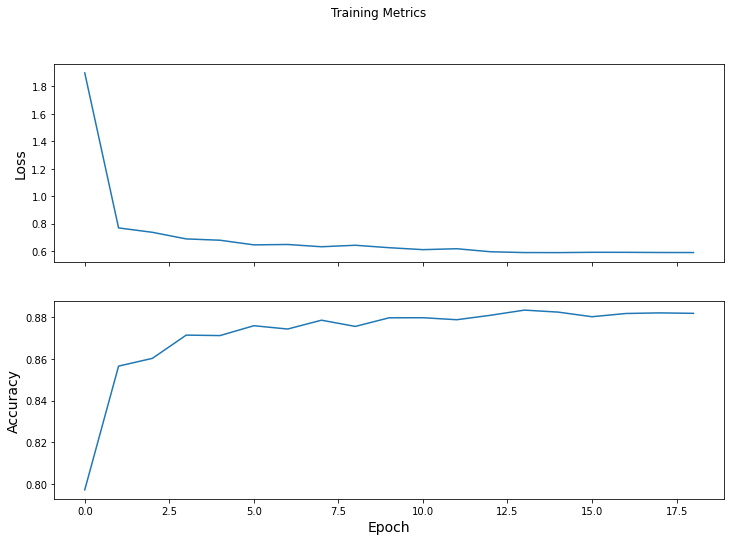

In [ ]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(history.history['loss'])

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(history.history['accuracy'])
plt.show()

In [ ]:
# model.summary()

In [ ]:
model.save("/content/drive/MyDrive/Text Classification/model/biLSTMAttention(10)")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Text Classification/model/biLSTMAttention(10)/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Text Classification/model/biLSTMAttention(10)/assets


In [ ]:
# del model

In [ ]:
model = load_model("/content/drive/MyDrive/Text Classification/model/biLSTMAttention(5)")

### Evaluate

In [ ]:
preds = model.predict(test_X, batch_size=64, verbose=1)

788/788 [==============================] - 83s 101ms/step


In [ ]:
y_pred = np.argmax(preds, axis=1)

In [ ]:
print('Accuracy =', np.mean(y_pred == test_y))

Accuracy = 0.889424890318226


In [ ]:
print(classification_report(test_y, y_pred, target_names=list(le.classes_)))

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.82      0.87      0.84      7567
        Doi song       0.65      0.73      0.69      2036
        Khoa hoc       0.73      0.72      0.73      2096
      Kinh doanh       0.93      0.81      0.86      5276
       Phap luat       0.86      0.92      0.89      3788
        Suc khoe       0.96      0.85      0.90      5417
        The gioi       0.92      0.94      0.93      6716
        The thao       0.98      0.97      0.98      6667
         Van hoa       0.91      0.94      0.93      6250
         Vi tinh       0.92      0.93      0.92      4560

        accuracy                           0.89     50373
       macro avg       0.87      0.87      0.87     50373
    weighted avg       0.89      0.89      0.89     50373



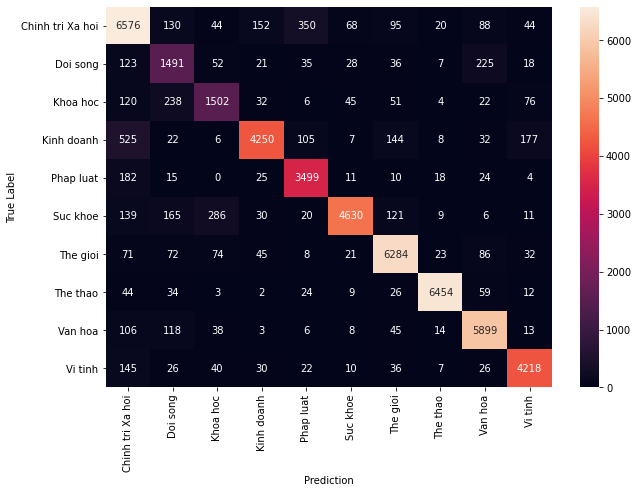

In [ ]:
cm = confusion_matrix(test_y, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in list(le.classes_)],
                  columns = [i for i in list(le.classes_)])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='True Label')
plt.show()

## Define model Bi-LSTM

In [ ]:
inputs = Input(shape=(maxLen,), name="inputs") #,batch_size=BATCH_SIZE)
# print(inputs.shape)
embed = Embedding(input_dim=nb_words,
                    output_dim=EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=maxLen,
                    # mask_zero=True,
                    trainable=True,
                    name="embedding")(inputs)
# print(embed.shape)
myEmbed = MyDenseLayer(input_length=maxLen, input_dim=EMBEDDING_DIM, name="myEmbed")(embed)
lstm = Bidirectional(
    LSTM(units=500
        # kernel_regularizer="l2",
        # recurrent_regularizer="l2",
        # bias_regularizer="l2"
         )
    )(myEmbed)
output = Dense(10, activation="relu")(lstm)
              #  kernel_regularizer="l2"
               
prediction = tf.nn.softmax(output)
model = Model(inputs=inputs, 
                  outputs=prediction)
opt = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
start = time()
history = model.fit(data_1_train, labels_train, epochs=50, batch_size=BATCH_SIZE,
                    validation_data=(data_1_val, labels_val), verbose=1, callbacks=[callback])
print(f"Time to train {time() - start}")

Epoch 1/50
422/422 [==============================] - 423s 902ms/step - loss: 0.9878 - accuracy: 0.6770 - val_loss: 0.5095 - val_accuracy: 0.8326
Epoch 2/50
422/422 [==============================] - 376s 892ms/step - loss: 0.4153 - accuracy: 0.8670 - val_loss: 0.3912 - val_accuracy: 0.8713
Epoch 3/50
422/422 [==============================] - 365s 864ms/step - loss: 0.2946 - accuracy: 0.9052 - val_loss: 0.3698 - val_accuracy: 0.8797
Epoch 4/50
422/422 [==============================] - 376s 892ms/step - loss: 0.2310 - accuracy: 0.9269 - val_loss: 0.3503 - val_accuracy: 0.8880
Epoch 5/50
422/422 [==============================] - 364s 863ms/step - loss: 0.1768 - accuracy: 0.9437 - val_loss: 0.3398 - val_accuracy: 0.8944
Epoch 6/50
422/422 [==============================] - 376s 891ms/step - loss: 0.1240 - accuracy: 0.9617 - val_loss: 0.3398 - val_accuracy: 0.8974
Epoch 7/50
422/422 [==============================] - 364s 862ms/step - loss: 0.0873 - accuracy: 0.9722 - val_loss: 0.3730 -

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 300)          77190300  
_________________________________________________________________
my_dense_layer_8 (MyDenseLay (None, 500, 300)          250000    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 1000)              3204000   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
_________________________________________________________________
tf.nn.softmax_6 (TFOpLambda) (None, 10)                0         
Total params: 80,654,310
Trainable params: 80,404,310
Non-trainable params: 250,000
_________________________________________

In [ ]:
model.save("/content/drive/MyDrive/Text Classification/model/biLSTM/biLSTM(1)")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Text Classification/model/biLSTM/biLSTM(1)/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Text Classification/model/biLSTM/biLSTM(1)/assets


### Evaluate

In [ ]:
preds = model.predict(test_X, batch_size=64, verbose=1)

788/788 [==============================] - 74s 94ms/step


In [ ]:
y_pred = np.argmax(preds, axis=1)

In [ ]:
print('Accuracy =', np.mean(y_pred == test_y))

Accuracy = 0.896849502709785


In [ ]:
print(classification_report(test_y, y_pred, target_names=list(le.classes_)))

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.83      0.87      0.85      7567
        Doi song       0.75      0.48      0.58      2036
        Khoa hoc       0.77      0.72      0.75      2096
      Kinh doanh       0.93      0.86      0.89      5276
       Phap luat       0.91      0.90      0.91      3788
        Suc khoe       0.91      0.93      0.92      5417
        The gioi       0.93      0.92      0.93      6716
        The thao       0.97      0.98      0.98      6667
         Van hoa       0.90      0.95      0.93      6250
         Vi tinh       0.89      0.96      0.93      4560

        accuracy                           0.90     50373
       macro avg       0.88      0.86      0.87     50373
    weighted avg       0.90      0.90      0.89     50373



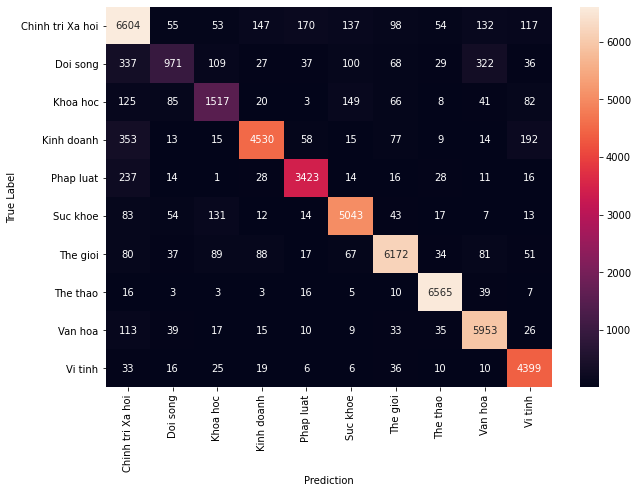

In [ ]:
cm = confusion_matrix(test_y, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in list(le.classes_)],
                  columns = [i for i in list(le.classes_)])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='True Label')
plt.show()

# Demo
Ba mô hình:
- Naive Bayes
- BiLSTM
- BiLSTM & Attention

In [ ]:
biA = load_model("/content/drive/MyDrive/Text Classification/model/biLSTMAttention(5)")
bi = load_model("/content/drive/MyDrive/Text Classification/model/biLSTM/biLSTM(1)")
naive = pickle.load(open("/content/drive/MyDrive/Text Classification/model/naive_bayes_frequenyc.pkl", 'rb'))

In [ ]:
biA.summary()

In [ ]:
biA.get_config()

In [ ]:
text = """Nhằm hỗ trợ khó khăn cho đội ngũ hướng dẫn viên (HDV) du lịch, tại Quyết định số 23/2021/QĐ-TTg quy định mức hỗ trợ cho mỗi HDV du lịch là 3,71 triệu đồng/người, theo phương thức chi trả 1 lần. Để được chi trả số tiền này, theo hướng dẫn, các HDV cần có đủ các điều kiện sau: Có thẻ HDV còn hạn sử dụng; Có hợp đồng lao động với doanh nghiệp kinh doanh dịch vụ lữ hành hoặc cung cấp dịch vụ hướng dẫn du lịch hoặc là hội viên các Hiệp hội về hướng dẫn du lịch; có phân công của tổ chức, cá nhân quản lý khu du lịch, điểm du lịch đối với HDV du lịch tại điểm.

HDV du lịch có nhu cầu hỗ trợ cần gửi hồ sơ đề nghị đến Sở Du lịch/Sở VH-TT&DL - nơi cấp thẻ cho HDV. Hạn tiếp nhận hồ sơ là hết 31/1/2022.

Sau khi quy định này được công bố thì trên nhiều diễn đàn HDV, Hiệp hội, câu lạc bộ du lịch cho rằng, điều kiện có thẻ HDV còn hiệu lực là đương nhiên bởi thẻ này do cơ quan quản lý Nhà nước cấp. Còn điều kiện thứ hai liên quan đến hợp đồng lao động với doanh nghiệp kinh doanh dịch vụ lữ hành hoặc cung cấp dịch vụ hướng dẫn viên du lịch hoặc hội viên các Hiệp hội về hướng dẫn viên du lịch đang gây khó cho nhiều hướng dẫn viên tự do.

Do đặc thù của du lịch mang tính mùa vụ nên từ trước đến nay, trong số 26.000 HDV cấp thẻ thì có đến 90% lực lượng hướng dẫn viên là lao động tự do. Đó là chưa kể từ năm 2020 trở lại đây, gần 90% doanh nghiệp du lịch lâm vào tình trạng ngừng hoạt động dạng “chết lâm sàng”, “hôn mê sâu” thì việc HDV có hợp đồng lao động dài hạn là việc không thể.

Anh Lại Văn Quân, một hướng dẫn viên có thẻ do Sở Du lịch Hà Nội cấp, cho biết: "Do dịch COVID-19, hoạt động du lịch gần như ngừng trệ năm rưỡi qua. Từ tháng 8/2020, tôi đã dừng hợp đồng lao động dài hạn tại doanh nghiệp du lịch do đơn vị ngừng hoạt động để lĩnh bảo hiểm thất nghiệp. Nếu chiếu theo quy định tại Quyết định 23 thì gần như rất ít HDV tự do được lĩnh tiền hỗ trợ".

“Trên diễn đàn du lịch, HDV đang tranh luận về thuật ngữ “hợp đồng lao động” bởi trong hoạt động du lịch, HDV có hợp đồng dài hạn với công ty rất ít mà chủ yếu là sử dụng HDV tự do với loại hình hợp đồng theo tour hay còn gọi là hợp đồng vụ việc từ 1 ngày đến 15 ngày. Do đó nếu chỉ căn cứ theo hợp đồng vụ việc để chứng minh có tham gia hoạt động hướng dẫn thì HDV sẽ đáp ứng được. Nhưng nếu đòi hỏi có hợp đồng lao động dài hạn thì gần như rất ít người đáp ứng được. Còn tham gia hội HDV thì hiện nhiều người không muốn vì đã có thẻ HDV do cơ quan Nhà nước cấp rồi nên thấy không cần thiết. Còn tham gia các hội HDV được thừa nhận thì rất ít, con số này chỉ khoảng 20% đổ lại”, anh Lại Văn Quân cho biết.

Cũng như anh Quân, nhiều HDV nói chung và HDV tại Hà Nội đang chờ hướng dẫn cụ thể để có thể làm hồ sơ, nhất là hồ sơ phù hợp với thực tế đặc điểm nghề nghiệp.

Còn ông Nguyễn Văn Hân, một HDV kỳ cựu cho biết: “Tôi là hướng dẫn viên chuyên khách quốc tế. Từ khoảng tháng 3/2020 đã không còn khách quốc tế vào Việt Nam nên HDV quốc tế gần như không còn đi tour và dừng hợp đồng lao động. Khi có thông tin về Quyết định 23, tôi có tìm hiểu các quy định của luật và các văn bản hướng dẫn thì rất ít HDV đáp ứng được do vướng yêu cầu có hợp đồng lao động có BHXH. Ngay như công ty trước tôi làm là Đường mòn Đông Dương cũng chỉ có 1 HDV duy nhất có hợp đồng dài hạn, còn lại có đợt cao điểm huy động tới 100 HDV đi tour thì toàn là HDV tự do”.

“Tìm hiểu kỹ về điều kiện cần có hợp đồng lao động hoặc phải là hội viên Hội Hướng dẫn viên xuất phát từ Luật Du lịch sửa đổi 2017 quy định HDV phải được quản lý từ một doanh nghiệp hoặc từ hiệp hội. Chính vì vậy, khi đi tour, HDV phải có thẻ HDV, chương trình tour và hợp đồng vụ việc. Nhưng khi thanh tra du lịch kiểm tra thường không chấp nhận hợp đồng này và đòi hỏi phải có hợp đồng dài hạn nhưng thực tế doanh nghiệp du lịch rất khó đáp ứng vì không thể nuôi “cứng” 1 đội HDV trong khi du lịch làm theo mùa vụ”, ông Nguyễn Văn Hân chia sẻ.

Tuy nhiên, theo ông Nguyễn Văn Hân, với hợp đồng theo tour thường HDV phải nộp lại cho doanh nghiệp khi kết thúc tour để tất toán chi phí. Do đó, rất ít HDV lưu lại loại hợp đồng này. Do đó, cơ quan quản lý nên có hướng dẫn cụ thể về loại hợp đồng trong hồ sơ và thời điểm xác thực về loại hợp đồng này để tránh trục lợi chính sách bởi loại hợp đồng này dễ xin xác nhận từ đơn vị lữ hành."""

In [ ]:
text = text_preprocess(text)
text = [text]
text

['hỗ_trợ khó_khăn đội_ngũ hướng_dẫn_viên hdv du_lịch quyết_định <number> <number> qđ ttg quy_định hỗ_trợ hdv du_lịch <number> triệu đồng phương_thức chi_trả <number> chi_trả tiền hướng_dẫn hdv điều_kiện thẻ hdv hạn sử_dụng hợp_đồng lao_động doanh_nghiệp kinh_doanh dịch_vụ lữ_hành cung_cấp dịch_vụ hướng_dẫn du_lịch hội_viên hiệp_hội hướng_dẫn du_lịch phân_công tổ_chức cá_nhân quản_lý khu du_lịch du_lịch đối_với hdv du_lịch hdv du_lịch nhu_cầu hỗ_trợ gửi hồ_sơ đề_nghị sở du_lịch sở vh tt dl thẻ hdv hạn tiếp_nhận hồ_sơ <number> <number> <number> quy_định công_bố diễn_đàn hdv hiệp_hội câu lạc_bộ du_lịch điều_kiện thẻ hdv hiệu_lực đương_nhiên thẻ cơ_quan quản_lý nhà_nước điều_kiện hai liên_quan hợp_đồng lao_động doanh_nghiệp kinh_doanh dịch_vụ lữ_hành cung_cấp dịch_vụ hướng_dẫn_viên du_lịch hội_viên hiệp_hội hướng_dẫn_viên du_lịch hướng_dẫn_viên tự_do đặc_thù du_lịch mùa_vụ <number> hdv thẻ <number> lực_lượng hướng_dẫn_viên lao_động tự_do <number> trở_lại <number> doanh_nghiệp du_lịch lâm t

In [ ]:
textbi = tokenizer.texts_to_sequences(text)
# textbi

In [ ]:
maxLen = 500
textbi = pad_sequences(textbi, maxlen=maxLen)

In [ ]:
predsBiA = biA.predict(textbi, batch_size=64, verbose=1)
predsBi = bi.predict(textbi, batch_size=64, verbose=1)
predsNaive = naive.predict(text)

1/1 [==============================] - 0s 329ms/step


In [ ]:
y_predBiA = np.argmax(predsBiA, axis=1)
y_predBi = np.argmax(predsBi, axis=1)
print(y_predBiA, y_predBi, predsNaive)

[0] [0] [0]


In [ ]:
print(f"Bi-LSTM%Attention: {le.inverse_transform(y_predBiA)}")
print(f"Bi-LSTM: {le.inverse_transform(y_predBi)}")
print(f"Naive Bayes: {le.inverse_transform(predsNaive)}")

Bi-LSTM%Attention: ['Chinh tri Xa hoi']
Bi-LSTM: ['Chinh tri Xa hoi']
Naive Bayes: ['Chinh tri Xa hoi']
